In [149]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [150]:
data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [151]:
data = data.drop(['Address'],axis=1)
data=(data-data.min())/(data.max()-data.min())
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [152]:
Y = data['Price']
X = data.drop(['Price'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [153]:
X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

In [154]:
m1 = len(X_test)
m2 = len(X_train)
m3 = len(X)
print(m1,m2,m3)

1500 3500 5000


In [155]:
def compute_cost(x, y, w, b): 
    m = len(x)
    total_cost = 0
    f = np.dot(w,x)+b
    total_cost = np.dot(f-y,f-y)
    total_cost = total_cost/(2*m)
    return total_cost

In [156]:
def compute_gradient(x, y, w, b): 
    m = len(x)
    dj_dw = 0
    dj_db = 0
    f = np.dot(w,x)+b
    dj_db = np.sum(f-y)
    dj_db = dj_db/m
    dj_dw = np.dot(f-y,x.T)
    dj_dw = dj_dw/m
    return dj_dw, dj_db

In [157]:
def gradient_descent(x, y, w,b,alpha, num_iters):
    m = len(x)
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w,b)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db             
        if i<100000:      
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.6f} ")
    
    return w,b

In [164]:
w_in = np.array([0,0,0,0,0])

w,b = gradient_descent(X_train.T,Y_train.T,w_in,0.1,0.001,1000)
print("w,b found by gradient descent:",w,b)

Iteration    0: Cost 24.944171 
Iteration  100: Cost 1.993387 
Iteration  200: Cost 1.055849 
Iteration  300: Cost 0.748512 
Iteration  400: Cost 0.646649 
Iteration  500: Cost 0.612748 
Iteration  600: Cost 0.601447 
Iteration  700: Cost 0.597677 
Iteration  800: Cost 0.596418 
Iteration  900: Cost 0.595998 
w,b found by gradient descent: [0.7895783  0.46191178 0.3703835  0.00273179 0.42989615] -0.5824978282692829


In [159]:
m = len(X_test)
predicted = np.zeros(m)
X_index = np.zeros(m)
for i in range(m):
    predicted[i] = np.dot(w,X_test[i]) + b
    X_index[i]= i

Text(0.5, 0, 'Features Index')

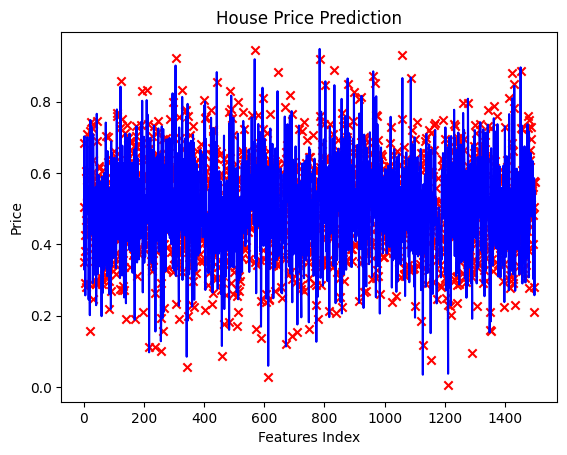

In [162]:
plt.plot(X_index,predicted, c = "b")
plt.scatter(X_index,Y_test, marker='x', c='r') 
plt.title("House Price Prediction")
# Set the y-axis label
plt.ylabel('Price')
# Set the x-axis label
plt.xlabel('Features Index')

In [166]:
compute_cost(X_test.T,Y_test.T,w,b)

0.2534107555212143